In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

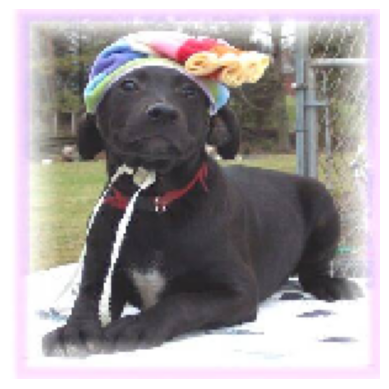

In [ ]:
#Exploring the data
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

dog_train_dir = os.path.join(train_dir, 'dogs')

# Get a list of all dog image files in the directory
dog_images = os.listdir(dog_train_dir)

# Choose a random dog image from the list
random_dog_image = random.choice(dog_images)

random_dog_image_path = os.path.join(dog_train_dir, random_dog_image)

img = image.load_img(random_dog_image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, batch_size=batch_size, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(PATH, batch_size=1, shuffle=False, color_mode='rgb', target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', classes=['test'],)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


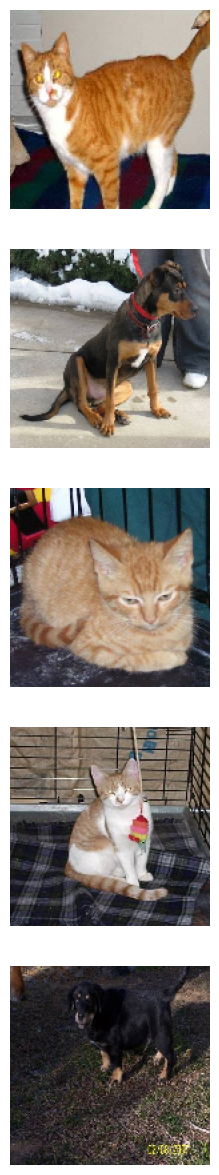

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=90, width_shift_range=0.2,
    height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True,
    vertical_flip=True, rescale=1./255)


Found 2000 images belonging to 2 classes.


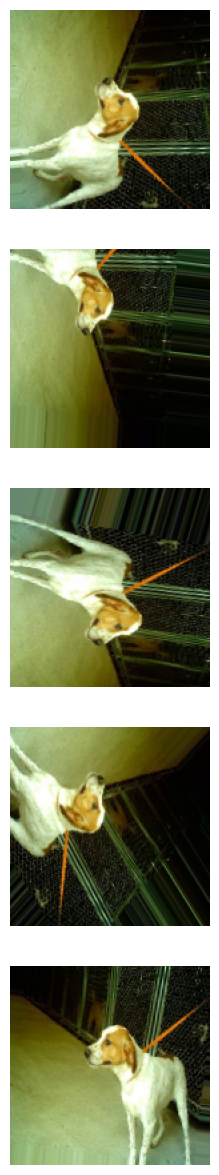

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# Train model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 150, 150, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 150, 150, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                        

In [ ]:
# 8
checkpoint = ModelCheckpoint( filepath='./', monitor='val_acc', verbose=1, save_best_only=True,
                              mode='auto', save_freq='epoch')
history = model.fit(x=train_data_gen, epochs=10, validation_data=val_data_gen, callbacks=[checkpoint])

Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.6330 

16/16 [==============================] - 410s 26s/step - loss: 0.6721 - accuracy: 0.6330 - val_loss: 0.8988 - val_accuracy: 0.5480
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6665 

16/16 [==============================] - 408s 26s/step - loss: 0.6342 - accuracy: 0.6665 - val_loss: 0.9945 - val_accuracy: 0.5150
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6570 

16/16 [==============================] - 458s 29s/step - loss: 0.6490 - accuracy: 0.6570 - val_loss: 0.6427 - val_accuracy: 0.6210
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.6149 - accuracy: 0.6725 

16/16 [==============================] - 439s 28s/step - loss: 0.6149 - accuracy: 0.6725 - val_loss: 0.6886 - val_accuracy: 0.6030
Epoch 5/10
16/16 [==============================] - ETA: 0s - loss: 0.5855 - accuracy: 0.6880 

16/16 [==============================] - 402s 25s/step - loss: 0.5855 - accuracy: 0.6880 - val_loss: 0.7320 - val_accuracy: 0.6010
Epoch 6/10
16/16 [==============================] - ETA: 0s - loss: 0.5779 - accuracy: 0.6940 

16/16 [==============================] - 439s 28s/step - loss: 0.5779 - accuracy: 0.6940 - val_loss: 0.6824 - val_accuracy: 0.6280
Epoch 7/10
16/16 [==============================] - ETA: 0s - loss: 0.5915 - accuracy: 0.7015 

16/16 [==============================] - 437s 28s/step - loss: 0.5915 - accuracy: 0.7015 - val_loss: 0.6440 - val_accuracy: 0.6650
Epoch 8/10
16/16 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.6935 

16/16 [==============================] - 438s 28s/step - loss: 0.5798 - accuracy: 0.6935 - val_loss: 0.6601 - val_accuracy: 0.6360
Epoch 9/10
16/16 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.7250 

16/16 [==============================] - 438s 28s/step - loss: 0.5476 - accuracy: 0.7250 - val_loss: 0.7050 - val_accuracy: 0.6340
Epoch 10/10
16/16 [==============================] - ETA: 0s - loss: 0.5520 - accuracy: 0.7215 

16/16 [==============================] - 452s 29s/step - loss: 0.5520 - accuracy: 0.7215 - val_loss: 0.7273 - val_accuracy: 0.6230


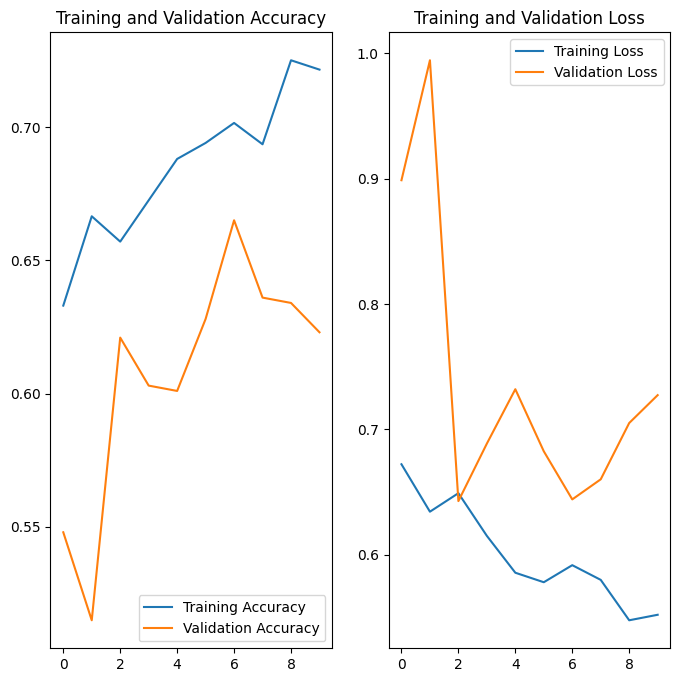

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probabilities = [int(boolean) for boolean in model.predict(test_data_gen) > 0.5]
print(probabilities)

50/50 [==============================] - 4s 74ms/step
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
